In [1]:
import pandas as pd

In [7]:
def load_df(path, s, k):
    dfs = []
    for i in range(s, k):
        p = path.format(i)
        df = pd.read_csv(p)
        dfs.append(df)

    dfs_a = [v['A'].values for v in dfs]
    return pd.DataFrame(dfs_a).transpose()

In [15]:
uncased_bert = load_df("../outputs/submission_bert_768_seqlen512-L{}.csv", 1, 11)
cased_bert = load_df("../outputs/submission_bert_cased_768_seqlen512-L{}.csv", 6, 11)

In [16]:
corrs = pd.concat([uncased_bert, cased_bert], axis=1, keys=['df1', 'df2']).corr().loc['df2', 'df1']

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

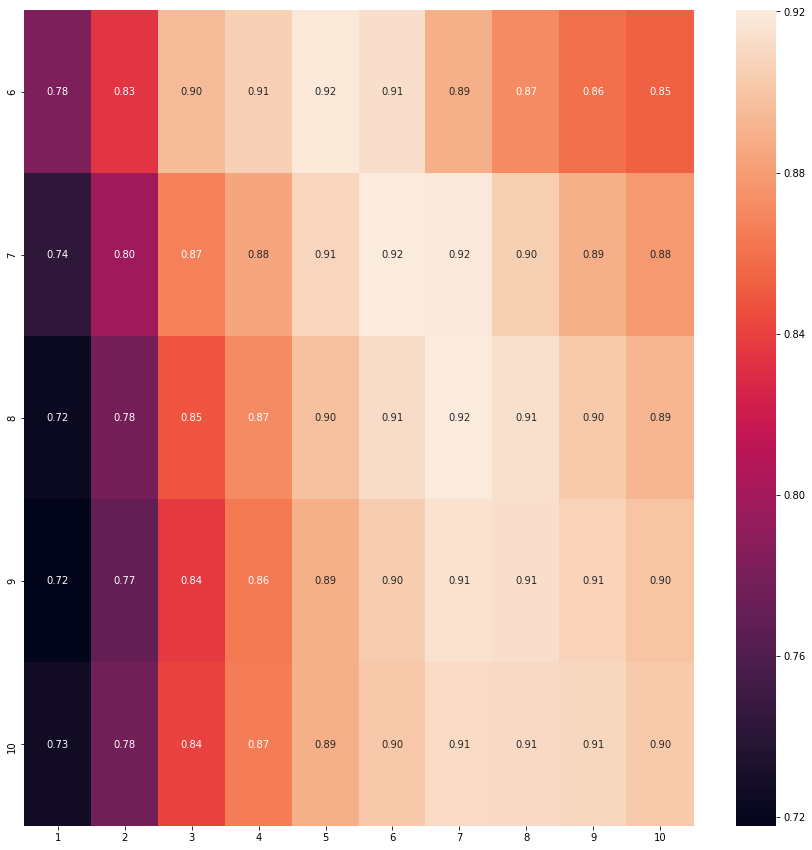

In [18]:
plt.figure(figsize=(15, 15))
layers = [i for i in range(1, 11)]
x_layers = [i for i in range(6, 11)]
sns.heatmap(corrs, annot=True, fmt=".2f", xticklabels=layers, yticklabels=x_layers)